In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# os.getcwd()
df=pd.read_csv(r'C:\\Users\\lenovo\Desktop\car data.csv')

In [64]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [25]:
df.shape

(301, 9)

In [62]:
#unique values of categorical data
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Fuel_Type'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [27]:
#check null or missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [29]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [30]:
#not mentioning car_name as its not providing any value in prediction
final_data=df[[ 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [35]:
final_data['Current_year']=2020
final_data['no_years']=final_data['Current_year']-final_data['Year']

In [60]:
#no need for the columns as we created no_years
final_data.drop(['Year'])
final_data.drop(['Current_year'],axis=1,inplace=True)

In [61]:
final_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [67]:
#converting categorical data to numerical and drop_first used to not overlap with actual
final_data=pd.get_dummies(final_data,drop_first=True)

In [66]:
#where cng go->if cng will be the value automatically diesel and petrol will be 0 therefore cng dropped from table
final_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [ ]:
sns.pairplot(final_data)

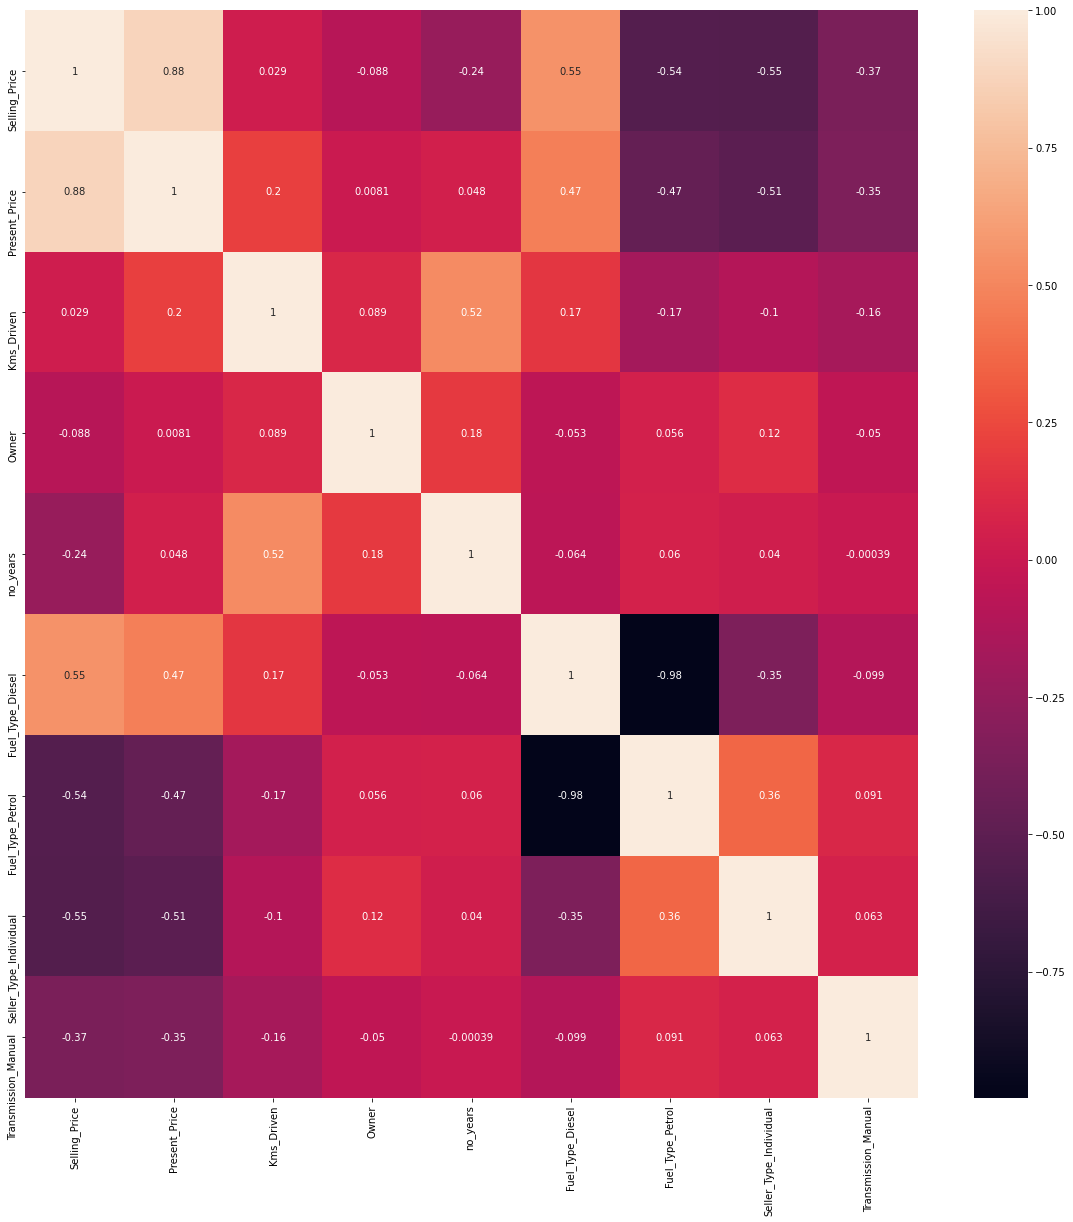

In [80]:
corrmat=final_data.corr() #correlations amongst columns
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))

#plotting heatmap
g=sns.heatmap(final_data[top_corr_features].corr(),annot=True)

In [86]:
#independent and dependent variables
#iloc[row_start:row_end, column_start:column_end]
X=final_data.iloc[:,1:] #dependent variable i.e from index 1 to last
y=final_data.iloc[:,0] #independent variable i.e Selling_price

In [87]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [89]:
#Feature importance i.e which are the important features
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [90]:
print(model.feature_importances_)  #columns having highest to lowest value as for priority for more value is given

[0.39952264 0.03964988 0.00044076 0.07890271 0.21610945 0.01493594
 0.12050712 0.1299315 ]


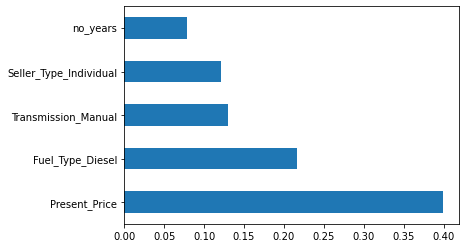

In [91]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [93]:
#use shift+tab for displaying all paramters inside a function
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [94]:
##Hyperparamters
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [106]:
#RandomizedSearchCV is faster than GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [102]:
#Randomized Search CV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace (start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of Levels in tree
max_depth = [int (x) for x in np.linspace (5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each Leaf node
min_samples_leaf = [1, 2, 5, 10]

In [100]:
#create random grid like use to do in GridSearchCV
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [109]:
#use the random grid for searching best hyperparameters
rf=RandomForestRegressor()

In [110]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [111]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.9s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.1s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   43.8s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [112]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [113]:
predictions=rf_random.predict(X_test)

In [114]:
predictions

array([ 5.14508047,  7.40500613,  5.62924052,  7.01903051,  2.88110428,
        4.67241548,  5.37516561,  3.03362845,  7.80425756,  0.7011088 ,
        1.15501208,  5.04394128,  5.12298811,  6.6445558 ,  2.92476315,
        0.51103609,  7.8128156 ,  4.52364875,  7.48999172,  0.2390993 ,
        4.75093854,  0.48336871,  5.57038265, 10.30973345, 22.94370599,
        4.49439275,  0.63747827,  0.25292718,  2.69547236,  5.29498292,
        2.97271932,  0.68695169,  7.38305715, 11.23888471,  4.69332845,
        3.2974844 ,  0.5238405 ,  5.59186411,  4.67303781,  0.56704869,
        0.4307594 ,  1.23772048,  3.02316641, 10.75284641,  0.26561608,
        0.3493154 ,  4.6333143 ,  2.86620575,  5.30036451,  3.68454975,
       10.23912093,  0.55498923,  0.3574202 , 23.24312579, 11.7158047 ,
        7.36180278,  4.45232695,  5.51985461, 23.24312579,  1.43771352,
        3.4286676 ])

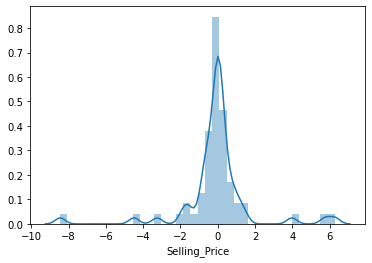

In [115]:
sns.distplot(y_test-predictions)

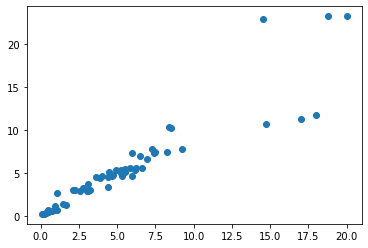

In [116]:
plt.scatter(y_test,predictions)